In [ ]:
import numpy as np

In [ ]:
class WindyGrid():
    def __init__(self , rows , cols , start):
        self.rows = rows
        self.cols = cols
        self.i = start[0]
        self.j = start[1]

    def set(self, rewards , actions, probs):
        self.probs = probs # transition probability
        self.actions  = actions
        self.rewards = rewards

    def is_terminal(self, s):
        return s not in self.actions

    def all_states(self):
        return (set(self.actions.keys()) | set(self.rewards.keys()))

In [ ]:
def initialize_windy_grid():
    g = WindyGrid(3, 4, (2, 0))
    rewards = {(0, 3): 1, (1, 3): -1}
    actions = {
        (0, 0): ('D', 'R'),
        (0, 1): ('L', 'R'),
        (0, 2): ('L', 'D', 'R'),
        (1, 0): ('U', 'D'),
        (1, 2): ('U', 'D', 'R'),
        (2, 0): ('U', 'R'),
        (2, 1): ('L', 'R'),
        (2, 2): ('L', 'R', 'U'),
        (2, 3): ('L', 'U'),
    }

    # p(s' | s, a) represented as:
    # KEY: (s, a) --> VALUE: {s': p(s' | s, a)}
    probs = {
        ((2, 0), 'U'): {(1, 0): 1.0},
        ((2, 0), 'D'): {(2, 0): 1.0},
        ((2, 0), 'L'): {(2, 0): 1.0},
        ((2, 0), 'R'): {(2, 1): 1.0},
        ((1, 0), 'U'): {(0, 0): 1.0},
        ((1, 0), 'D'): {(2, 0): 1.0},
        ((1, 0), 'L'): {(1, 0): 1.0},
        ((1, 0), 'R'): {(1, 0): 1.0},
        ((0, 0), 'U'): {(0, 0): 1.0},
        ((0, 0), 'D'): {(1, 0): 1.0},
        ((0, 0), 'L'): {(0, 0): 1.0},
        ((0, 0), 'R'): {(0, 1): 1.0},
        ((0, 1), 'U'): {(0, 1): 1.0},
        ((0, 1), 'D'): {(0, 1): 1.0},
        ((0, 1), 'L'): {(0, 0): 1.0},
        ((0, 1), 'R'): {(0, 2): 1.0},
        ((0, 2), 'U'): {(0, 2): 1.0},
        ((0, 2), 'D'): {(1, 2): 1.0},
        ((0, 2), 'L'): {(0, 1): 1.0},
        ((0, 2), 'R'): {(0, 3): 1.0},
        ((2, 1), 'U'): {(2, 1): 1.0},
        ((2, 1), 'D'): {(2, 1): 1.0},
        ((2, 1), 'L'): {(2, 0): 1.0},
        ((2, 1), 'R'): {(2, 2): 1.0},
        ((2, 2), 'U'): {(1, 2): 1.0},
        ((2, 2), 'D'): {(2, 2): 1.0},
        ((2, 2), 'L'): {(2, 1): 1.0},
        ((2, 2), 'R'): {(2, 3): 1.0},
        ((2, 3), 'U'): {(1, 3): 1.0},
        ((2, 3), 'D'): {(2, 3): 1.0},
        ((2, 3), 'L'): {(2, 2): 1.0},
        ((2, 3), 'R'): {(2, 3): 1.0},
        ((1, 2), 'U'): {(0, 2): 0.5, (1, 3): 0.5},
        ((1, 2), 'D'): {(2, 2): 1.0},
        ((1, 2), 'L'): {(1, 2): 1.0},
        ((1, 2), 'R'): {(1, 3): 1.0},
    }
    g.set(rewards, actions, probs)
    return g

## The grid world which we are going to use is shown below
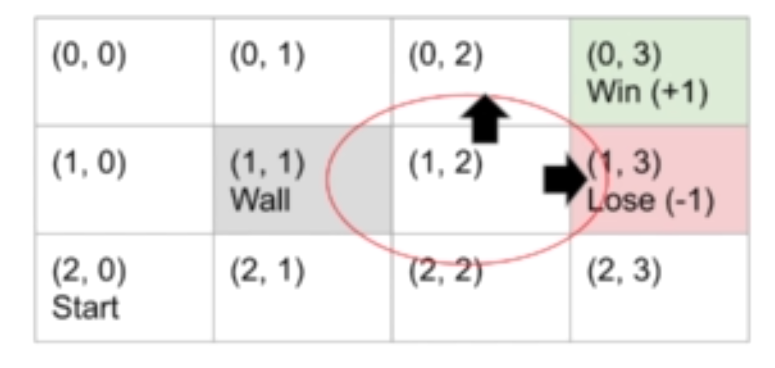

## Visualization Functions

In [ ]:
def print_values(V, g):
    print("Printing Values")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i,j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="") # -ve sign takes up an extra space
        print("")

def print_policy(P, g):
    print("Printing Policy")
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i,j), ' ')
            print("  %s  |" % a, end="") 
        print("")

## Initialize Windy Grid

In [ ]:
windy_grid = initialize_windy_grid()
ACTION_SPACE = ("U" , "D" , "L" , "R")

## Assign transition probabilities

In [ ]:
# re-structure the transition probs stored in windy grid world
trans_probs = {}
rewards = {}
for (s , a) , v in windy_grid.probs.items():
    for s2 , p in v.items():
        trans_probs[(s , a , s2)] = p
        rewards[(s ,  a , s2)] = windy_grid.rewards.get(s2, 0 ) 

## Initializing the Value function

In [ ]:
V = {}

for i in windy_grid.all_states():
    V[i] = 0.0

## Initializing Policy 

In [ ]:
Policy = {}

for i in windy_grid.actions.keys():
    Policy[i] = "R"

## Value Iteration

In [ ]:
it = 0
gamma = 0.9
threshold = 1e-3

while True:

    # Policy Evaluation

    biggest_change = 0
    for s in windy_grid.actions.keys():
        old_v = V[s]
        new_v = -np.inf
        for a in ACTION_SPACE:
            v = 0
            for s2 in windy_grid.all_states():
                r = rewards.get((s , a , s2) , 0)

                #V(S) += p(s'|s , a)*(r + gamma*V(s'))

                v += trans_probs.get((s ,  a , s2) , 0)*(r + gamma*V[s2])

            if v > new_v:
                new_v = v

        V[s] = new_v
        biggest_change = max(biggest_change , np.abs(old_v - new_v))

    it += 1
    
    print("iteration ", it)
    print_policy(Policy , windy_grid)

    if biggest_change < threshold:
        break
    
    # Policy Improvement

    for s in windy_grid.actions.keys():
        old_a = Policy[s]
        best_a = None
        best_v = -float("inf")

        for a in ACTION_SPACE:
            v = 0
            for s2 in windy_grid.all_states():
                r = rewards.get((s , a , s2) , 0)
                v += trans_probs.get((s , a , s2) , 0)*(r + gamma*V[s2])

            if v > best_v:
                best_v = v
                best_a = a
        
        Policy[s] = best_a

iteration  1
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  R  |     |  R  |     |
---------------------------
  R  |  R  |  R  |  R  |
iteration  2
Printing Policy
---------------------------
  U  |  R  |  R  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  U  |  U  |  U  |  D  |
iteration  3
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  U  |  U  |  U  |  D  |
iteration  4
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  U  |  L  |  L  |  L  |
iteration  5
Printing Policy
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  D  |     |
---------------------------
  U  |  L  |  L  |  L  |
